In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
dataset = pd.read_csv('data.csv')

In [51]:
dataset.head()

,palavra,erro_gramatica,erro_truncamento,erro_espelhamento,erro_acentuacao,correta
0,conseguiu,0,0,0,0,1
1,conseigiu,1,0,0,0,0
2,conseguiu,0,0,0,0,1
3,concegiu,1,0,0,0,0
4,conceguiu,1,0,0,0,0


In [52]:
dataset.set_index("palavra", inplace=True)

In [53]:
dataset.head()

,erro_gramatica,erro_truncamento,erro_espelhamento,erro_acentuacao,correta
palavra,,,,,
conseguiu,0,0,0,0,1
conseigiu,1,0,0,0,0
conseguiu,0,0,0,0,1
concegiu,1,0,0,0,0
conceguiu,1,0,0,0,0


In [54]:
dataset.isnull().sum().sort_values(ascending=False)

erro_gramatica       0
erro_truncamento     0
erro_espelhamento    0
erro_acentuacao      0
correta              0
dtype: int64

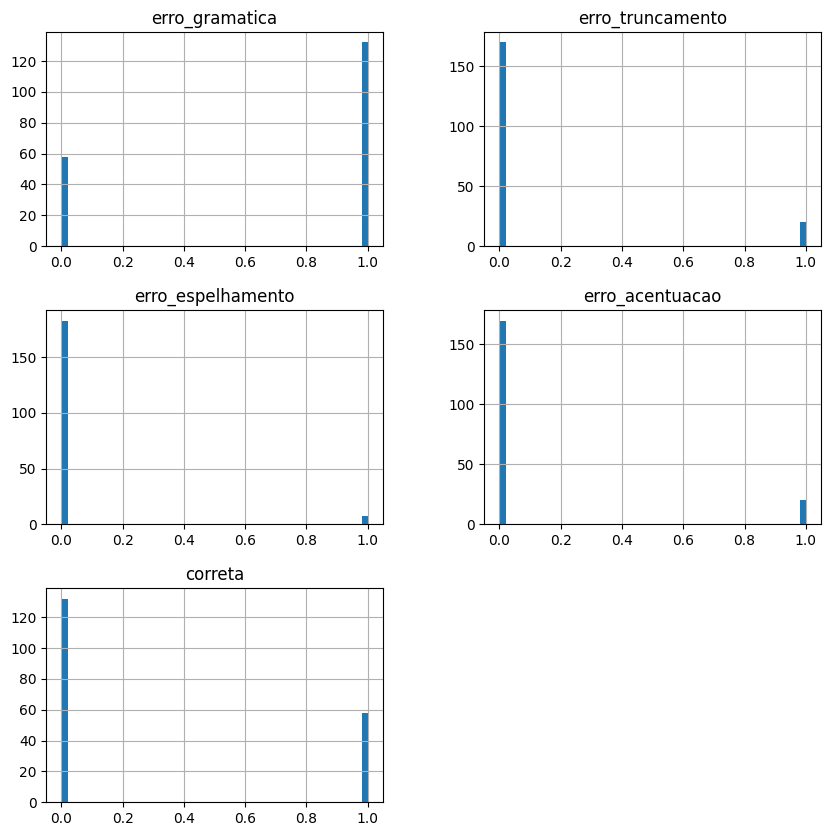

In [55]:
dataset.hist(figsize=(10, 10), bins=50)
plt.show()

In [56]:
dataset.corr()

,erro_gramatica,erro_truncamento,erro_espelhamento,erro_acentuacao,correta
erro_gramatica,1.000000,0.227362,-0.052368,0.190122,-1.000000
erro_truncamento,0.227362,1.000000,-0.067083,-0.117647,-0.227362
erro_espelhamento,-0.052368,-0.067083,1.000000,0.115000,0.052368
erro_acentuacao,0.190122,-0.117647,0.115000,1.000000,-0.190122
correta,-1.000000,-0.227362,0.052368,-0.190122,1.000000


In [57]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(dataset)

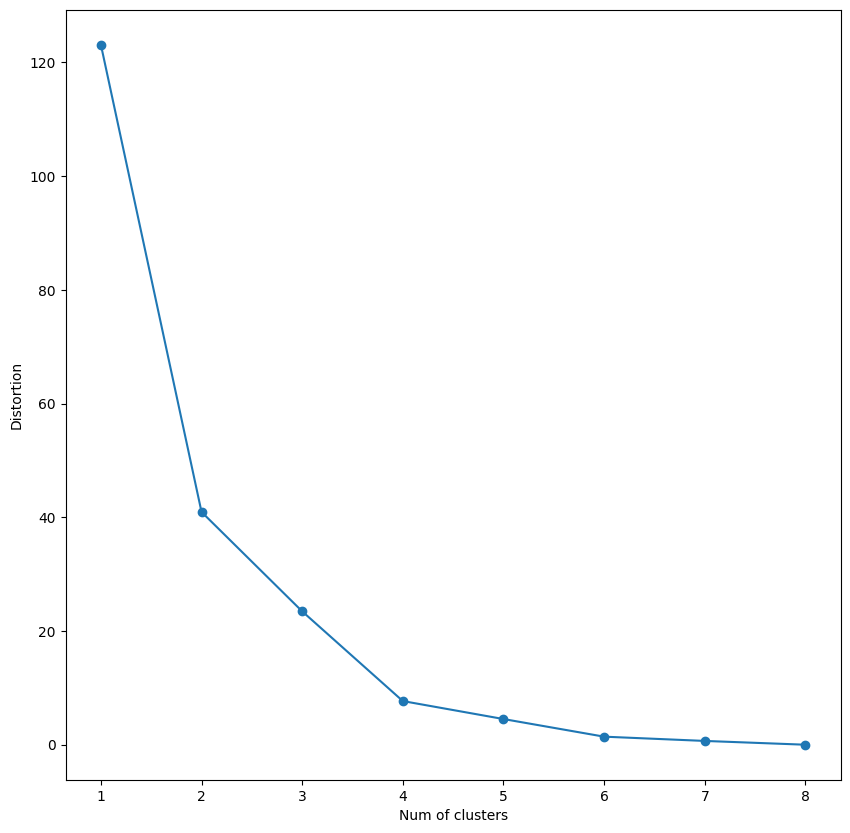

In [60]:
distortions = []
for i in range(1, 9):
    km = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300, random_state=0)
    km.fit(dataset)
    distortions.append(km.inertia_)


plt.plot(range(1, 9), distortions, marker="o")
plt.xlabel("Num of clusters")
plt.ylabel("Distortion")
plt.show()

[[-5.55111512e-16 -5.55111512e-17  5.17241379e-02  1.72413793e-02
   1.00000000e+00]
 [ 1.00000000e+00 -2.77555756e-17  6.93889390e-17 -2.77555756e-17
   4.44089210e-16]
 [ 1.00000000e+00  1.00000000e+00  0.00000000e+00  4.16333634e-17
   1.11022302e-16]
 [ 1.00000000e+00  4.16333634e-17  5.26315789e-02  1.00000000e+00
   1.11022302e-16]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   5.55111512e-17]]


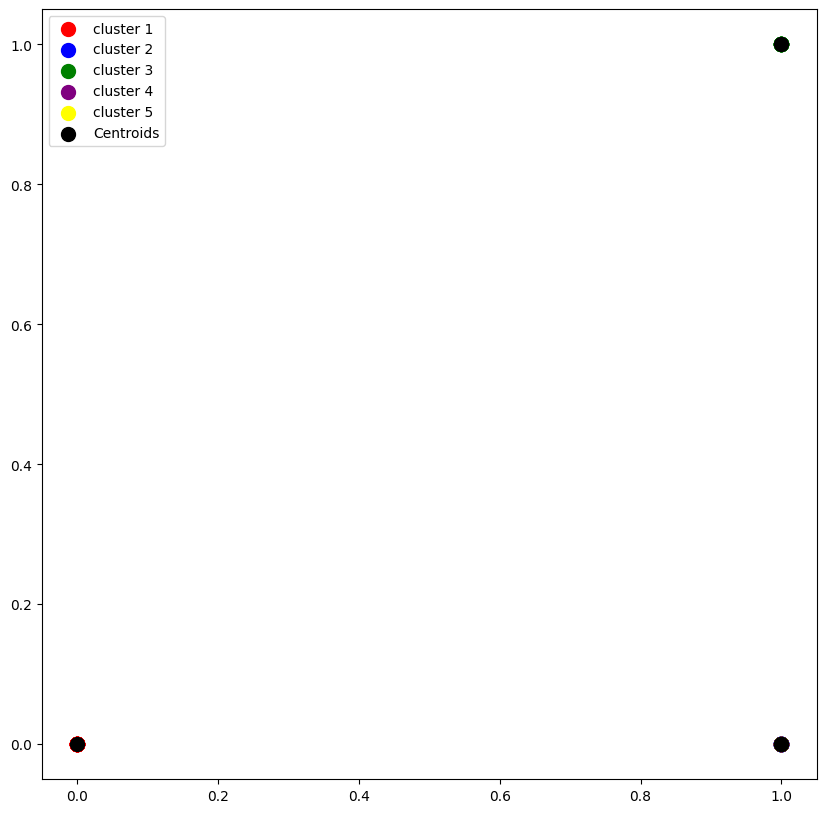

In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,random_state=0)
y_kmeans = kmeans.fit_predict(dataset)
print(kmeans.cluster_centers_)

cluster_1 = dataset.loc[y_kmeans == 0]
cluster_2 = dataset.loc[y_kmeans == 1]
cluster_3 = dataset.loc[y_kmeans == 2]
cluster_4 = dataset.loc[y_kmeans == 3]
cluster_5 = dataset.loc[y_kmeans == 4]


plt.scatter(
    cluster_1[dataset.columns[0]],
    cluster_1[dataset.columns[1]],
    s=100,
    c="red",
    label="cluster 1",
)
plt.scatter(
    cluster_2[dataset.columns[0]],
    cluster_2[dataset.columns[1]],
    s=100,
    c="blue",
    label="cluster 2",
)
plt.scatter(
    cluster_3[dataset.columns[0]],
    cluster_3[dataset.columns[1]],
    s=100,
    c="green",
    label="cluster 3",
)
plt.scatter(
    cluster_4[dataset.columns[0]],
    cluster_4[dataset.columns[1]],
    s=100,
    c="purple",
    label="cluster 4",
)
plt.scatter(
    cluster_5[dataset.columns[0]],
    cluster_5[dataset.columns[1]],
    s=100,
    c="yellow",
    label="cluster 5",
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=100,
    c="black",
    label="Centroids",
)
plt.legend(scatterpoints=1)
plt.rcParams["figure.figsize"] = [10, 10]
plt.show()

In [65]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 0.00


/home/luigill/.local/share/mise/installs/python/3.11.9/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/luigill/.local/share/mise/installs/python/3.11.9/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/luigill/.local/share/mise/installs/python/3.11.9/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/luigill/.local/share/mise/installs/python/3.11.9/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (8) 

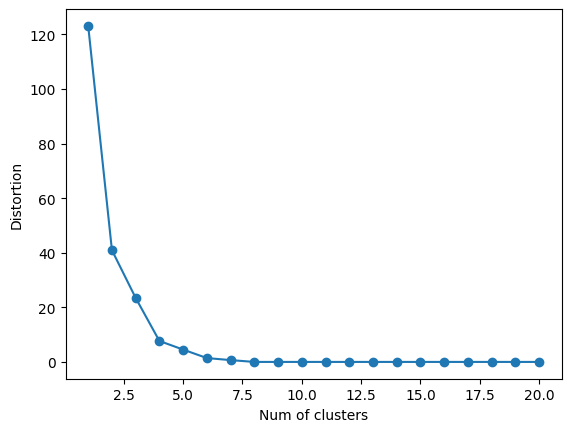

In [9]:
distortions = []
for i in range(1,21):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)


plt.plot(range(1,21), distortions, marker = 'o')
plt.xlabel('Num of clusters')
plt.ylabel('Distortion')
plt.show()

In [27]:
km = KMeans(n_clusters = 10, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

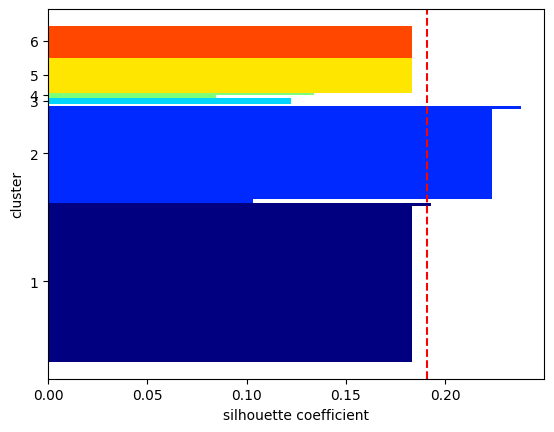

In [21]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric = 'euclidean')


y_ax_lower, y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('cluster')
plt.xlabel('silhouette coefficient')
plt.show()
